## Week 12 Assignment - W200 Introduction to Data Science Programming, UC Berkeley MIDS

Write code in this Jupyter Notebook to solve the following problems. This assignment addresses material covered in Unit 11. Please upload this **Notebook** with your solutions to your GitHub repository in your SUBMISSIONS/week_12 folder by 11:59PM PST the night before class. Do **NOT** push/upload the data file. If you turn-in anything on ISVC please do so under the Week 12 Assignment category. 

## Objectives

- Explore and glean insights from a real dataset using pandas
- Practice using pandas for exploratory analysis, information gathering, and discovery
- Practice using matplotlib for data visualization

## Dataset

You are to analyze campaign contributions to the 2016 U.S. presidential primary races made in California. Use the csv file located here: https://drive.google.com/file/d/1Lgg-PwXQ6TQLDowd6XyBxZw5g1NGWPjB/view?usp=sharing. You should download and save this file in the same folder as this notebook is stored.  This file originally came from the U.S. Federal Election Commission (https://www.fec.gov/).

**DO NOT PUSH THIS FILE TO YOUR GITHUB REPO!**

- Best practice is to not have DATA files in your code repo. As shown below, the default load is outside of the folder this notebook is in. If you change the folder where the file is stored please update the first cell!
- If you do accidentally push the file to your github repo - follow the directions here to fix it: https://docs.google.com/document/d/15Irgb5V5G7pKPWgAerH7FPMpKeQRunbNflaW-hR2hTA/edit?usp=sharing

Documentation for this data can be found here: https://drive.google.com/file/d/11o_SByceenv0NgNMstM-dxC1jL7I9fHL/view?usp=sharing

## General Guidelines:

- This is a **real** dataset and so it may contain errors and other pecularities to work through
- This dataset is ~218mb, which will take some time to load (and probably won't load in Google Sheets or Excel)
- If you make assumptions, annotate them in your responses
- While there is one code/markdown cell positioned after each question as a placeholder, some of your code/responses may require multiple cells
- Double-click the markdown cells that say YOUR ANSWER HERE to enter your written answers. If you need more cells for your written answers, make them markdown cells (rather than code cells)

## Setup

Run the two cells below. 

The first cell will load the data into a pandas dataframe named `contrib`. Note that a custom date parser is defined to speed up loading. If Python were to guess the date format, it would take even longer to load.  

The second cell subsets the dataframe to focus on just the primary period through May 2016. Otherwise, we would see general election donations which would make it harder to draw conclusions about the primaries.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

# These commands below set some options for pandas and to have matplotlib show the charts in the notebook
pd.set_option('display.max_rows', 1000)
pd.options.display.float_format = '{:,.2f}'.format
%matplotlib inline

# Define a date parser to pass to read_csv
d = lambda x: pd.datetime.strptime(x, '%d-%b-%y')

# Load the data
# We have this defaulted to the folder OUTSIDE of your repo - please change it as needed
contrib = pd.read_csv('P00000001-CA.csv', index_col=False, parse_dates=['contb_receipt_dt'], date_parser=d)
print(contrib.shape)

# Note - for now, it is okay to ignore the warning about mixed types. 

/Users/oscar/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (6,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
<ipython-input-2-44fe46b618d3>:11: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  d = lambda x: pd.datetime.strptime(x, '%d-%b-%y')


(1125659, 18)


In [3]:
# Subset data to primary period 
contrib = contrib.copy()[contrib['contb_receipt_dt'] <= datetime.datetime(2016, 5, 31)]
print(contrib.shape)

(654502, 18)


## 1. Data  Exploration (20 points)

**1a. First, take a preliminary look at the data.**
- Print the *shape* of the data. What does this tell you about the number of variables and rows you have?
- Print a list of column names. 
- Review the documentation for this data (link above). Do you have all of the columns you expect to have?
- Sometimes variable names are not clear unless we read the documentation. In your own words, based on the documentation, what information does the `election_tp` variable contain?

In [4]:
print(contrib.shape)
print(contrib.columns)

(654502, 18)
Index(['cmte_id', 'cand_id', 'cand_nm', 'contbr_nm', 'contbr_city',
       'contbr_st', 'contbr_zip', 'contbr_employer', 'contbr_occupation',
       'contb_receipt_amt', 'contb_receipt_dt', 'receipt_desc', 'memo_cd',
       'memo_text', 'form_tp', 'file_num', 'tran_id', 'election_tp'],
      dtype='object')


`1a I have all the column I expect and election_tp gives what type of election the contribution was made to (primary, general, runoff, etc...)`

**1b. Print the first 5 rows from the dataset to manually check some of the data.** 

This is a good idea to ensure the data loaded and the columns parsed correctly!

In [5]:
contrib.head(5)

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,tran_id,election_tp
0,C00575795,P00003392,"Clinton, Hillary Rodham","AULL, ANNE",LARKSPUR,CA,"949,391,913.00",NaN,RETIRED,50.00,2016-04-26,NaN,X,* HILLARY VICTORY FUND,SA18,1091718,C4768722,P2016
1,C00575795,P00003392,"Clinton, Hillary Rodham","CARROLL, MARYJEAN",CAMBRIA,CA,"934,284,638.00",NaN,RETIRED,200.00,2016-04-20,NaN,X,* HILLARY VICTORY FUND,SA18,1091718,C4747242,P2016
2,C00575795,P00003392,"Clinton, Hillary Rodham","GANDARA, DESIREE",FONTANA,CA,"923,371,507.00",NaN,RETIRED,5.00,2016-04-02,NaN,X,* HILLARY VICTORY FUND,SA18,1091718,C4666603,P2016
3,C00577130,P60007168,"Sanders, Bernard","LEE, ALAN",CAMARILLO,CA,"930,111,214.00",AT&T GOVERNMENT SOLUTIONS,SOFTWARE ENGINEER,40.00,2016-03-04,NaN,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,SA17A,1077404,VPF7BKWA097,P2016
4,C00577130,P60007168,"Sanders, Bernard","LEONELLI, ODETTE",REDONDO BEACH,CA,"902,784,310.00",VERICOR ENTERPRISES INC.,PHARMACIST,35.00,2016-03-05,NaN,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,SA17A,1077404,VPF7BKX3MB3,P2016


**1c. Pick three variables from the dataset above and run some quick sanity checks.**

When working with a new dataset, it is important to explore and sanity check your variables. For example, you may want to examine the maximum and minimum values, a frequency count, or something else. Use the three markdown cells below to explain if your **three** chosen variables "pass" your sanity checks or if you have concerns about the integrity of your data and why. 

In [6]:
print(contrib['contb_receipt_amt'].max())
print(contrib['contb_receipt_amt'].min())
print(contrib['contb_receipt_amt'].count())

10800.0
-10000.0
654502


In [7]:
print(contrib['contb_receipt_dt'].max())
print(contrib['contb_receipt_dt'].min())
print(contrib['contb_receipt_dt'].count())

2016-05-31 00:00:00
2013-11-05 00:00:00
654502


In [8]:
print(contrib['cand_nm'].value_counts())

Sanders, Bernard             371795
Clinton, Hillary Rodham      163509
Cruz, Rafael Edward 'Ted'     57136
Carson, Benjamin S.           27342
Rubio, Marco                  14089
Fiorina, Carly                 4696
Paul, Rand                     4256
Bush, Jeb                      3114
Kasich, John R.                2988
Trump, Donald J.               2255
Walker, Scott                   713
Huckabee, Mike                  531
O'Malley, Martin Joseph         397
Lessig, Lawrence                372
Graham, Lindsey O.              342
Christie, Christopher J.        333
Stein, Jill                     197
Perry, James R. (Rick)          116
Webb, James Henry Jr.           106
Santorum, Richard J.             84
Johnson, Gary                    77
Jindal, Bobby                    31
Pataki, George E.                20
Gilmore, James S III              3
Name: cand_nm, dtype: int64


`1c cont_receipt_amt seems to fail as the max donation legally allowed is 2900 for one party member (which is how the data is structured) so having a 10800 contribution seems not legal or incorrect. The second issue is the fact that the min is negative meaning the candidates gave the donor money which is also not possible. This variable fails, The next is the dates and they seem to correct as none deviate from the 4 year election cycle. Lastly,the candidate names seem to all be correct as they are all politicians or confirmed running for a election in 2016`

**1d. Plotting a histogram** 

Make a histogram of **one** of the variables you picked above. What are some insights that you can see from this histogram? 
Remember to include on your histogram:
- Include a title
- Include axis labels
- The correct number of bins to see the breakout of values
- Hint: For some variables the range of values is very large. To do a better exploration, make the initial histogram the full range and then you can make a smaller histogram 'zoomed' in on a discreet range.

(array([2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 2.0000e+00, 3.0000e+00, 4.0000e+00, 3.4000e+01,
        4.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        6.0000e+00, 1.0000e+00, 3.0000e+00, 1.7000e+01, 5.8000e+01,
        2.0000e+00, 4.0000e+00, 2.0000e+00, 9.0000e+00, 2.0000e+00,
        1.3000e+01, 9.6000e+01, 5.5000e+01, 1.4300e+02, 2.7500e+02,
        1.5070e+03, 1.1970e+03, 1.6910e+03, 1.5050e+03, 1.0770e+03,
        1.1110e+03, 1.2980e+03, 2.0790e+03, 2.5460e+03, 3.1220e+03,
        2.7170e+03, 2.1200e+03, 3.1710e+03, 3.8340e+03, 2.7740e+03,
        3.7580e+03, 3.4820e+03, 4.8860e+03, 9.65

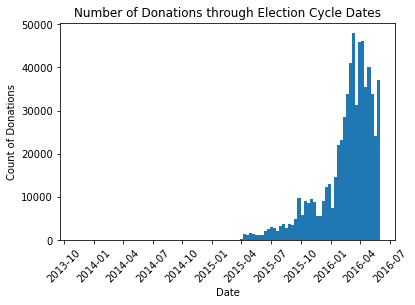

In [9]:
plt.xlabel('Date')
plt.ylabel('Count of Donations')
plt.title('Number of Donations through Election Cycle Dates')
plt.xticks(rotation = 45)
plt.hist(contrib['contb_receipt_dt'],bins=100)

`1d From this histogram we see that although donations start coming in early, it truly doesnt start ramping up until closer to the primary election`

## 2. Exploring Campaign Contributions (30 points)

Let's investigate the donations to the candidates.

**2a. Present a table that shows the number of donations to each candidate sorted by number of donations.**

- When presenting data as a table, it is often best to sort the data in a meaningful way. This makes it easier for your reader to examine what you've done and to glean insights.  From now on, all tables that you present in this assignment (and course) should be sorted.
- Hint: Use the `groupby` method. Groupby is explained in Unit 13: async 13.3 & 13.5
- Hint: Use the `sort_values` method to sort the data so that candidates with the largest number of donations appear on top.

Which candidate received the largest number of contributions (variable 'contb_receipt_amt')?

In [10]:
df = contrib[['cand_nm','contb_receipt_amt']].groupby(['cand_nm']).count()
df = df.sort_values(by=['contb_receipt_amt'], ascending = False).reset_index()
print(df)

                      cand_nm  contb_receipt_amt
0            Sanders, Bernard             371795
1     Clinton, Hillary Rodham             163509
2   Cruz, Rafael Edward 'Ted'              57136
3         Carson, Benjamin S.              27342
4                Rubio, Marco              14089
5              Fiorina, Carly               4696
6                  Paul, Rand               4256
7                   Bush, Jeb               3114
8             Kasich, John R.               2988
9            Trump, Donald J.               2255
10              Walker, Scott                713
11             Huckabee, Mike                531
12    O'Malley, Martin Joseph                397
13           Lessig, Lawrence                372
14         Graham, Lindsey O.                342
15   Christie, Christopher J.                333
16                Stein, Jill                197
17     Perry, James R. (Rick)                116
18      Webb, James Henry Jr.                106
19       Santorum, R

`2a Bernie Sanders ahd the largest number of contributions`

**2b. Now, present a table that shows the total value of donations to each candidate. sorted by total value of the donations**

Which candidate raised the most money in California?

In [11]:
df_2 = contrib[['cand_nm','contb_receipt_amt']].groupby(['cand_nm']).sum()

df_2 = df_2.sort_values(by=['contb_receipt_amt'], ascending = False).reset_index()
print(df_2)

                      cand_nm  contb_receipt_amt
0     Clinton, Hillary Rodham      39,368,777.01
1            Sanders, Bernard      18,773,871.31
2   Cruz, Rafael Edward 'Ted'       6,286,460.34
3                Rubio, Marco       4,846,483.72
4                   Bush, Jeb       3,325,536.83
5         Carson, Benjamin S.       2,952,109.00
6             Kasich, John R.       1,553,823.54
7              Fiorina, Carly       1,468,489.42
8            Trump, Donald J.         893,356.89
9                  Paul, Rand         797,624.29
10              Walker, Scott         495,006.90
11   Christie, Christopher J.         456,066.00
12         Graham, Lindsey O.         408,595.00
13    O'Malley, Martin Joseph         297,834.26
14             Huckabee, Mike         230,890.60
15     Perry, James R. (Rick)         208,400.00
16           Lessig, Lawrence         186,144.50
17      Webb, James Henry Jr.          76,568.16
18              Johnson, Gary          41,187.60
19       Santorum, R

`2b Hillary Clinton raised the most money`

**2c. Combine the tables (sorted by either a or b above).**

- Looking at the two tables you presented above - if those tables are Series convert them to DataFrames.
- Rename the variable (column) names to accurately describe what is presented.
- Merge together your tables to show the *count* and the *value* of donations to each candidate in one table.
- Hint: Use the `merge` method.

In [12]:
df.columns = ['Candidate', 'Number of Donations']
df_2.columns = ['Candidate','Total Amount Donated']
Merged = df.merge(df_2, how='inner', on='Candidate')
print(Merged)

                    Candidate  Number of Donations  Total Amount Donated
0            Sanders, Bernard               371795         18,773,871.31
1     Clinton, Hillary Rodham               163509         39,368,777.01
2   Cruz, Rafael Edward 'Ted'                57136          6,286,460.34
3         Carson, Benjamin S.                27342          2,952,109.00
4                Rubio, Marco                14089          4,846,483.72
5              Fiorina, Carly                 4696          1,468,489.42
6                  Paul, Rand                 4256            797,624.29
7                   Bush, Jeb                 3114          3,325,536.83
8             Kasich, John R.                 2988          1,553,823.54
9            Trump, Donald J.                 2255            893,356.89
10              Walker, Scott                  713            495,006.90
11             Huckabee, Mike                  531            230,890.60
12    O'Malley, Martin Joseph                  397 

**2d. Calculate and add a new variable to the table from 2c that shows the average \$ per donation. Print this table sorted by the average donation**

In [13]:
print(Merged.columns)
Merged["Average Donation"] = Merged["Total Amount Donated"]/Merged["Number of Donations"]
Final = Merged.reset_index()
del Final['index']
print(Final)

Index(['Candidate', 'Number of Donations', 'Total Amount Donated'], dtype='object')
                    Candidate  Number of Donations  Total Amount Donated  \
0            Sanders, Bernard               371795         18,773,871.31   
1     Clinton, Hillary Rodham               163509         39,368,777.01   
2   Cruz, Rafael Edward 'Ted'                57136          6,286,460.34   
3         Carson, Benjamin S.                27342          2,952,109.00   
4                Rubio, Marco                14089          4,846,483.72   
5              Fiorina, Carly                 4696          1,468,489.42   
6                  Paul, Rand                 4256            797,624.29   
7                   Bush, Jeb                 3114          3,325,536.83   
8             Kasich, John R.                 2988          1,553,823.54   
9            Trump, Donald J.                 2255            893,356.89   
10              Walker, Scott                  713            495,006.90   
11  

**2e. Plotting a Bar Chart**

Make a single bar chart that shows two different bars per candidate with one bar as the total value of the donations and the other as average $ per donation. 
- Show the Candidates Name on the x-axis
- Show the amount on the y-axis
- Include a title
- Include axis labels
- Hint: Make the y-axis a log-scale to show both numbers! (matplotlib docs: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.yscale.html )

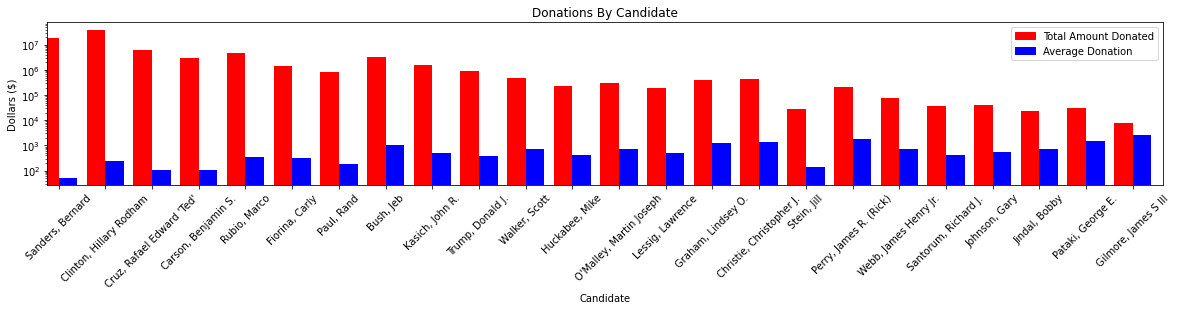

In [14]:
fig = plt.figure(figsize=(20,3))
ax = plt.subplot(111)
width = 0.4
colors = {"Total Amount Donated":"red", "Average Donation": 'blue'}
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color = colors[label]) for label in labels]
Merged['Total Amount Donated'].plot(kind='bar', color='red', ax=ax, width=width, position=1)
Merged['Average Donation'].plot(kind='bar', color='blue', ax=ax, width=width, position=0)
ax.set_yscale('log')
ax.set_ylabel('Dollars ($)')
ax.set_xticklabels(Merged['Candidate'])
ax.set_xlabel("Candidate")
plt.legend(handles,labels)
plt.title('Donations By Candidate')
plt.xticks(rotation = 45)

plt.show()


**2f. Comment on the results of your data analysis in a short paragraph.**

- There are several interesting conclusions you can draw from the table you have created.
- What have you learned about campaign contributions in California?
- We are looking for data insights here rather than comments on the code!

`2f The trend seems to show the less donations received the higher the average value of the donations, I have learnt that campaign contributions in California tend to favor the top candidates as they get the vast majority of the money, but people with less support get more donations per individual`

## 3. Exploring Donor Occupations (30 points)

Above in part 2, we saw that some simple data analysis can give us insights into the campaigns of our candidates. Now let's quickly look to see what *kind* of person is donating to each campaign using the `contbr_occupation` variable.

**3a. Show the top 5 occupations of individuals that contributed to Hillary Clinton.** 

- Subset your data to create a dataframe with only donations for Hillary Clinton.
- Then use the `value_counts` and `head` methods to present the top 5 occupations (`contbr_occupation`) for her donors.
- Note: we are just interested in the count of donations, not the value of those donations.

In [15]:
hillary = contrib[contrib['cand_nm']=='Clinton, Hillary Rodham']
hillary.value_counts("contbr_occupation").head()

contbr_occupation
RETIRED                  33450
ATTORNEY                  7315
INFORMATION REQUESTED     4742
TEACHER                   3591
HOMEMAKER                 3436
dtype: int64

**3b. Write a function called `get_donors`.**

Imagine that you want to do the previous operation on several candidates.  To keep your work neat, you want to take the work you did on the Clinton-subset and wrap it in a function that you can apply to other subsets of the data.

- The function should take a DataFrame as a parameter, and return a Series containing the counts for the top 5 occupations contained in that DataFrame.

In [16]:
def get_donors(df):
    """This function takes a dataframe that contains a variable named contbr_occupation.
    It outputs a Series containing the counts for the 5 most common values of that
    variable."""
    return df.value_counts("contbr_occupation").head()


**3c. Now run the `get_donors` function on subsets of the dataframe corresponding to three candidates. Show each of the three candidates below.**

- Hillary Clinton
- Bernie Sanders
- Donald Trump

In [17]:
get_donors(contrib[contrib['cand_nm'].isin(['Clinton, Hillary Rodham','Sanders, Bernard','Trump, Donald J.'])])


contbr_occupation
NOT EMPLOYED         99179
RETIRED              49347
TEACHER              13764
ATTORNEY             13272
SOFTWARE ENGINEER     8861
dtype: int64

**3d. Finally, use `groupby` to separate the entire dataset by candidate.**

- Call .apply(get_donors) on your groupby object, which will apply the function you wrote to each subset of your data.
- Look at your output and marvel at what pandas can do in just one line!

In [18]:
subset = contrib.groupby(['cand_nm']).apply(get_donors)
print(subset)

cand_nm                    contbr_occupation                     
Bush, Jeb                  RETIRED                                     996
                           HOMEMAKER                                   180
                           ATTORNEY                                     92
                           Q.A.                                         89
                           PRESIDENT                                    84
Carson, Benjamin S.        RETIRED                                   13692
                           INFORMATION REQUESTED PER BEST EFFORTS     1614
                           HOMEMAKER                                  1049
                           PHYSICIAN                                   329
                           R.N.                                        234
Christie, Christopher J.   RETIRED                                      38
                           NONE                                         22
                           CONSULT

**3e. Comment on your data insights & findings in a short paragraph.**

`3e It is interesting to see how most people who are funding the elections are either retied or unemployed specifically bernie who has 96% of all unemployed donations. It is amazing to see such clear deviations. `

**3f. Think about your findings in section 3 vs. your findings in section 2 of this assignment.**

Do you have any new data insights into the results you saw in section 2 now that you see the top occupations for each candidate?

`3f It makes sense that although Bernie sanders was getting a lot more donations, the amount donated was less since most his supporters were unemployed`


## 4. Plotting Data (20 points)

There is an important element that we have not yet explored in this dataset - time.

**4a. Present a single line chart with the following elements.**

- Show the date on the x-axis
- Show the contribution amount on the y-axis
- Include a title
- Include axis labels

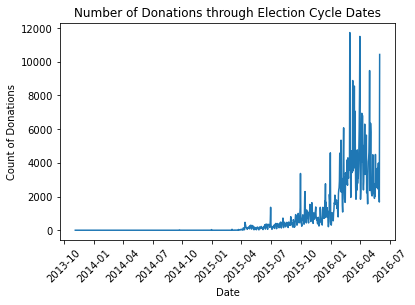

In [42]:

x = contrib[['contb_receipt_dt','cand_nm']].groupby(['contb_receipt_dt']).count()
plt.xlabel('Date')
plt.ylabel('Count of Donations')
plt.title('Number of Donations through Election Cycle Dates')
plt.xticks(rotation = 45)
plt.plot(x)
plt.show()


**4b. Make a better time-series line chart**

This chart is messy and it is hard to gain insights from it.  Improve the chart from 4a so that your new chart shows a specific insight. In the spot provided, write the insight(s) that can be gained from this new time-series line chart.

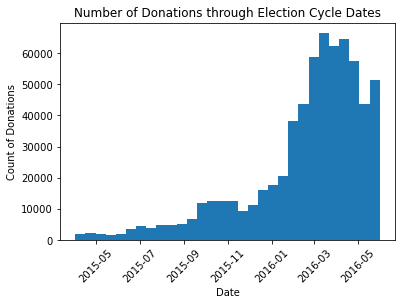

In [46]:
contrib_2 = contrib[contrib['contb_receipt_dt'] > '2015-04-01']
plt.xlabel('Date')
plt.ylabel('Count of Donations')
plt.title('Number of Donations through Election Cycle Dates')
plt.xticks(rotation = 45)
plt.hist(contrib_2['contb_receipt_dt'],bins=30)
plt.show()

`4b The histogram limited to above 2015 is much better since it allows for better visualization and removes all the empty space before 2015. with the bars we can see how the donations peaked in early 2016 and slowly died down after which makes sense as that is when the biggest pushed for donations came, by lowering the number of bins it also gives better idea and reduces noise which was present in 4a`

## If you have feedback for this homework, please submit it using the link below:

http://goo.gl/forms/74yCiQTf6k